- ## Escolha do modelo
- ## Treinamento do modelo
- ## Teste do modelo
- ## Armazenamento do modelo

In [120]:
# maximiza nro de linhas e colunas para exibição
# inibe mensagens de warning
import pandas as pd
pd.set_option('display.max_rows', None) # permite a máxima visualização das linhas em um display
pd.set_option('display.max_columns', None) # permite a máxima visualização das colunas em um display
import warnings
warnings.simplefilter('ignore') # inibe a exibição de avisos de warning
warnings.filterwarnings('ignore') # inibe a exibição de avisos de warning

In [121]:
# modelos de clusterização
from sklearn.cluster import KMeans # algoritmo de clusterização que agrupa dados com características similares em torno de centros (centroides).
from sklearn.cluster import AgglomerativeClustering # algoritmo de clustering hierárquico em que cada observação é inicialmente considerada um cluster e, em seguida, os clusters são recursivamente fundidos até que um único cluster contendo todas as observações seja formado. Este método determina a distância de ligação entre os clusters para decidir quais clusters devem ser fundidos. 
from sklearn.cluster import AffinityPropagation # algoritmo de agrupamento de dados que funciona com base no conceito de "passagem de mensagens" entre os pontos de dados. Ele é usado em aprendizado de máquina e análise de dados para identificar automaticamente um número ideal de clusters com base na similaridade dos dados. 

from scipy.cluster.hierarchy import linkage # realiza agrupamento hierárquico/aglomerativo. A entrada y pode ser uma matriz de distância condensada 1-D ou um array 2-D de vetores de observação.
from scipy.cluster.hierarchy import dendrogram # diagrama que representa uma árvore hierárquica. Essa representação diagramática é frequentemente usada em diferentes contextos: em clustering hierárquico, na análise filogenética e na visualização de dados hierárquicos.
from scipy.cluster.hierarchy import fcluster # utilizada para achatar um dendrograma e resulta na atribuição de pontos de dados originais a clusters únicos.
#from scipy.cluster.hierarchy import cophenet # calcula as distâncias cophenéticas entre cada observação em uma análise de agrupamento hierárquico definida pelo link Z.
#from scipy.spatial.distance import pdist # calcula as distâncias entre pares de observações em um espaço n-dimensional. Ela é útil para aplicações que envolvem cálculos de distância entre grandes coleções de vetores.

In [122]:
# métricas de avaliação dos modelos
#from sklearn.metrics import adjusted_mutual_info_score # ajuste do escore de Informação Mútua (MI) para levar em conta a chance. Ele mede a similaridade entre dois conjuntos de clusters, ajustando o valor da Informação Mútua para a linha de base esperada quando os clusters são atribuídos aleatoriamente.
from sklearn import cluster # implementa algoritmos populares de agrupamento não supervisionado, como K-Means, BIRCH e Clustering Aglomerativo. Estes algoritmos permitem agrupar dados não rotulados em clusters com base em suas características.
#from sklearn import covariance # fornece ferramentas para estimar com precisão a matriz de covariância de uma população sob várias configurações.
from sklearn import manifold # biblioteca de aprendizado de máquina de código aberto que fornece algoritmos de redução de dimensionalidade não linear, também conhecidos como aprendizado de manifold. Esses algoritmos são úteis para visualizar e analisar dados de alta dimensionalidade.

In [123]:
# preparação e visualização de dados
import numpy as np # computaçaõ de matrizes
from matplotlib import pyplot as plt # plotagem gráfica
import seaborn as sns # plotagem gráfica
import matplotlib.ticker as ticker  # plotagem gráfica

In [125]:
# carregando arquivo tratado em dataframe
df_card_trans = pd.read_csv('df_treated/df_card_trans.csv')

In [126]:
# conferindo a dimensão do dataframe, linhas e colunas
df_card_trans.shape

(8339, 35)

In [127]:
# ordenando pelo index o dataframe carregado
df_card_trans = df_card_trans.sort_index()

In [128]:
# reconhecendo as primeiras linhas do dataframe
df_card_trans.head(5)

,titular,saldo_cred_restante,freq_atu_saldo,qtde_compras,vr_max_compra_feita,vr_compra_feita_parcelas,dinh_adiantado_usu,freq_compras,freq_compras_1vez,freq_compras_parcelas,freq_pag_dinh_adiantado,trans_dinh_adiantado,trans_compra_feita,limite_cartao,vr_pag_feito_usu,vr_min_pagtos_feito_usu,%pag_integral_feito_usu,prazo_serv_cartao_usu,minmax__saldo_cred_restante,minmax__qtde_compras,minmax__vr_max_compra_feita,minmax__vr_compra_feita_parcelas,minmax__dinh_adiantado_usu,minmax__limite_cartao,minmax__vr_pag_feito_usu,minmax__vr_min_pagtos_feito_usu,power__freq_atu_saldo,power__freq_compras,power__freq_compras_1vez,power__freq_compras_parcelas,power__freq_pag_dinh_adiantado,power__trans_dinh_adiantado,power__trans_compra_feita,power__%pag_integral_feito_usu,power__prazo_serv_cartao_usu
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0.002148,0.001945,0.000000,0.004240,0.000000,0.031720,0.003978,0.001826,-1.269589,-0.787010,-0.909176,-0.622043,-0.888595,-0.911869,-0.591497,-0.693374,0.417156
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.168169,0.000000,0.000000,0.000000,0.136685,0.232053,0.080892,0.014034,-0.594878,-1.285866,-0.909176,-1.012022,1.102197,1.025584,-1.392628,1.179060,0.417156
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.131026,0.015766,0.018968,0.000000,0.000000,0.248748,0.012263,0.008210,0.612641,1.211921,1.724959,-1.012022,-0.888595,-0.911869,0.472489,-0.693374,0.417156
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.095038,0.027188,0.000000,0.059257,0.000000,0.058431,0.027602,0.031506,0.612641,0.488440,-0.909176,0.782421,-0.888595,-0.911869,0.206232,-0.693374,0.417156
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,0.032939,0.144598,0.157076,0.030595,0.000000,0.449082,0.125278,0.002592,0.612641,1.211921,1.724959,1.371236,-0.888595,-0.911869,1.633374,1.851822,0.417156


In [129]:
# verificando a posição de cada variável
df_card_trans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339 entries, 0 to 8338
Data columns (total 35 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   titular                           8339 non-null   object 
 1   saldo_cred_restante               8339 non-null   float64
 2   freq_atu_saldo                    8339 non-null   float64
 3   qtde_compras                      8339 non-null   float64
 4   vr_max_compra_feita               8339 non-null   float64
 5   vr_compra_feita_parcelas          8339 non-null   float64
 6   dinh_adiantado_usu                8339 non-null   float64
 7   freq_compras                      8339 non-null   float64
 8   freq_compras_1vez                 8339 non-null   float64
 9   freq_compras_parcelas             8339 non-null   float64
 10  freq_pag_dinh_adiantado           8339 non-null   float64
 11  trans_dinh_adiantado              8339 non-null   float64
 12  trans_

In [130]:
# separando as variáveis 'x' que participarão do treino do modelo
# apagando 5 variáveis que estão diminuindo o silhouette_score, elas não serão usadas
X = df_card_trans[list(df_card_trans.columns[18:])] 
X = X.drop(columns=(['power__freq_atu_saldo', 'power__freq_compras_1vez', 'power__freq_compras_parcelas',
                    'power__%pag_integral_feito_usu', 'power__prazo_serv_cartao_usu']), axis=1)

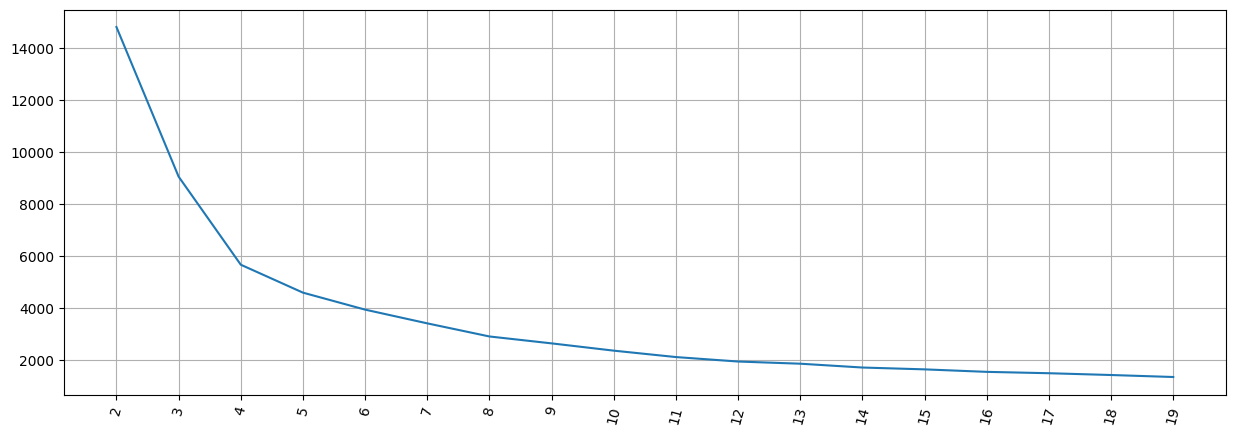

In [131]:
# método do cotovelo
# O método do cotovelo é uma técnica usada para determinar o número ideal de clusters em análise de agrupamento. Ele consiste em plotar a variância explicada (ou alguma outra métrica) em relação ao número de clusters e escolher o "cotovelo" da curva como o número ideal de clusters
# O método do cotovelo é comumente aplicado a algoritmos de agrupamento como o K-Means. Ele ajuda a encontrar o ponto em que adicionar mais clusters não traz mais muitos benefícios, indicando o número ideal de clusters para os dados
# Para aplicar o método do cotovelo, é necessário rodar o algoritmo de agrupamento (como K-Means) várias vezes com diferentes números de clusters, e então plotar a variância explicada (ou outra métrica) em relação ao número de clusters. O "cotovelo" da curva indica o número ideal de clusters a ser utilizado
distortions = [] 
max_loop=20 

for k in range(2, max_loop): 
    kmeans = KMeans(n_clusters=k) 
    kmeans.fit(X) 
    distortions.append(kmeans.inertia_) 
    
fig = plt.figure(figsize=(15, 5)) 
plt.plot(range(2, max_loop), distortions) 
plt.xticks([i for i in range(2, max_loop)], rotation=75)
plt.grid(True)

- traçando uma linha da ponta inicial em 2 até a ponta final 19 temos que o ponto mais distante dessa reta é o 4, então vamos escolher esse valor para definirmos o nro de cluster ideal baseado no cotovelo.

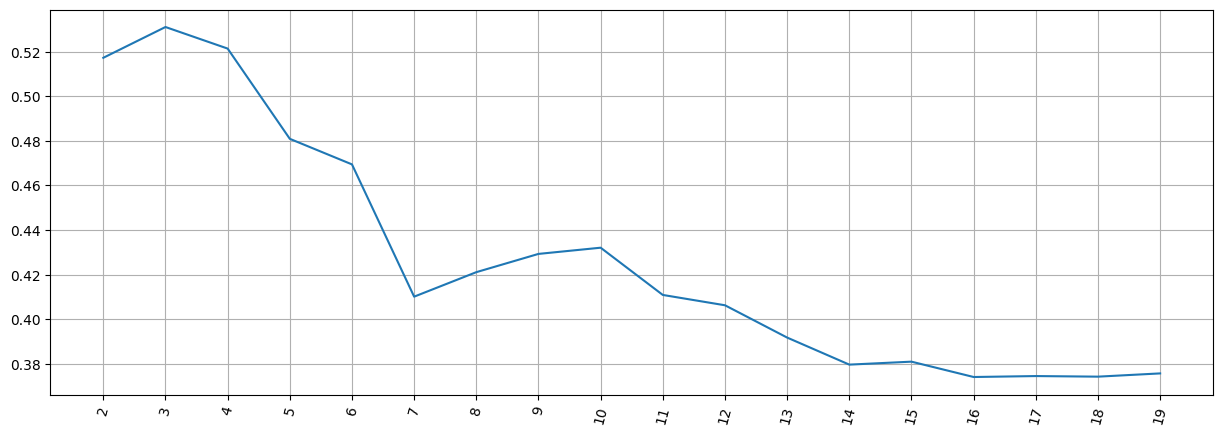

In [132]:
# método da silhueta
# O método da silhueta é uma técnica utilizada para determinar o número ideal de clusters em uma análise de agrupamento. Ele calcula um coeficiente de silhueta para cada ponto de dados, que varia de -1 a 1, indicando o quão bem o ponto está posicionado dentro do seu cluster
# Um valor de silhueta próximo a 1 indica que o ponto de dados está muito bem agrupado, enquanto valores próximos a -1 indicam que o ponto está mal agrupado. Em geral, valores acima de 0,5 são considerados bons, entre 0,2 e 0,5 são razoáveis, e abaixo de 0,2 são ruins. 
# A análise de silhueta pode ser usada para determinar o número ideal de clusters, examinando o gráfico de silhueta e escolhendo o número de clusters que resulta no maior valor médio de silhueta. Isso indica a melhor separação entre os clusters.
from sklearn import metrics 

silhouette_score = [] 

for k in range(2, max_loop): 
    kmeans = KMeans(n_clusters=k, random_state=10, n_init=10) #, n_jobs=-1) 
    kmeans.fit(X) 
    silhouette_score.append(metrics.silhouette_score(X, kmeans.labels_, random_state=10)) 

fig = plt.figure(figsize=(15, 5)) 
plt.plot(range(2, max_loop), silhouette_score) 
plt.xticks([i for i in range(2, max_loop)], rotation=75) 
plt.grid(True)

- aqui vamos escolher o nro 4 como o nro de clusters a ser gerado, pois o valor da coluna y da silhueta está acima de 0,52, um bom valor, e o valor do cotovelo também deu 4, vamos conciliar esse valor por aparecer vantajosamente nos dois métodos silhouette e cotovelo.

In [133]:
# treinando-ajustando o kmeans com 4 clusters
nclust=4

#Ajustar com k-means 
k_means = cluster.KMeans(n_clusters=nclust) 
k_means.fit(X) 

KMeans(n_clusters=4)

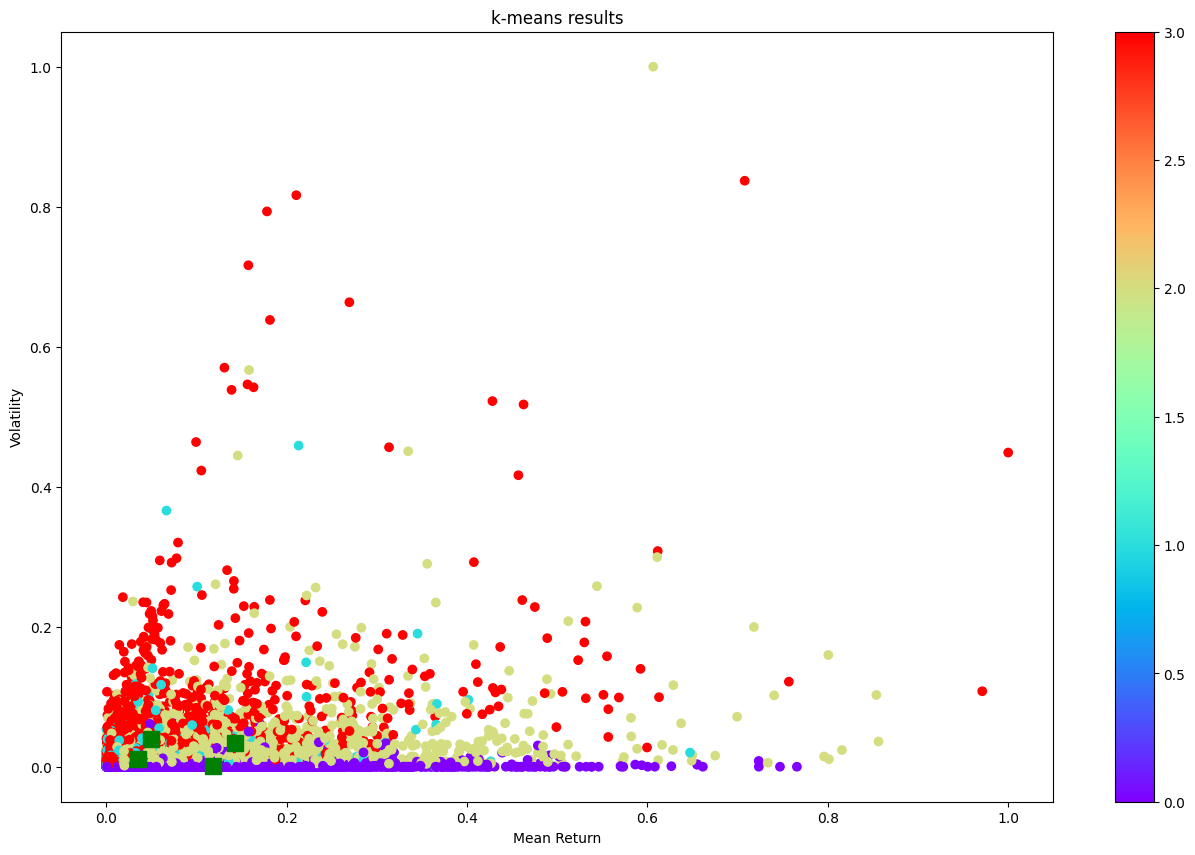

In [134]:
# extraindo os rótulos e plotando os clusters do kmeans
target_labels = k_means.predict(X)

centroids = k_means.cluster_centers_ 
fig = plt.figure(figsize=(16,10)) 
ax = fig.add_subplot(111) 
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=k_means.labels_, cmap='rainbow', label = X.index) 
ax.set_title('k-means results') 
ax.set_xlabel('Mean Return')

ax.set_ylabel('Volatility') 
plt.colorbar(scatter) 
plt.plot(centroids[:,0],centroids[:,1],'sg',markersize=11)


- Apesar de termos alguns pontos invadindo outros clusters, no geral, podemos verificar a existência de 4 clusters de forma gráfica, visualizando os centróides desses clusters.

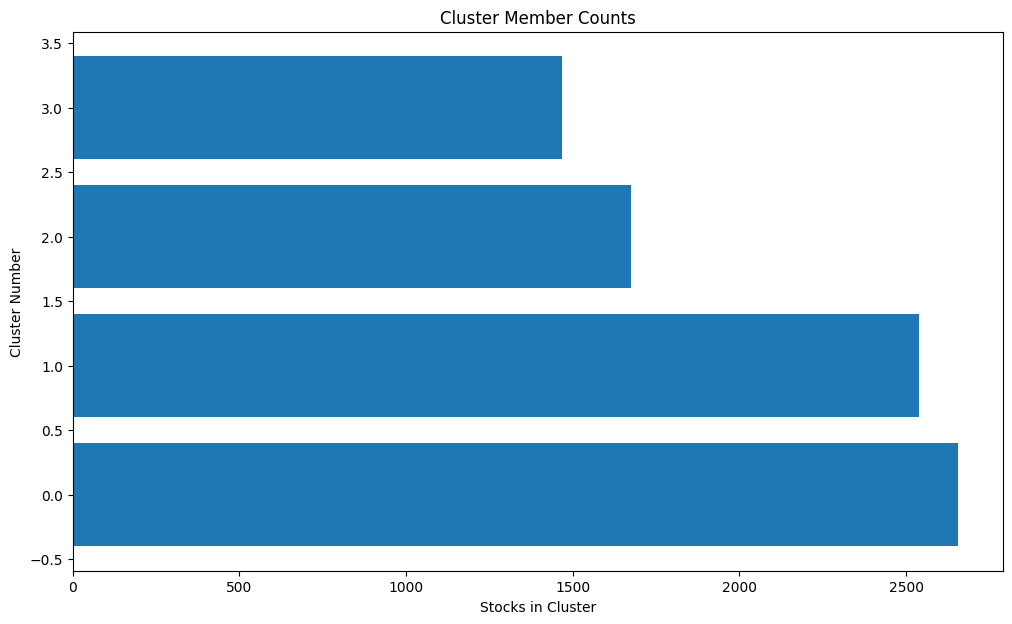

In [135]:
# mostrando o número de ocorrências em cada cluster
clustered_series = pd.Series(index=X.index, data=k_means.labels_.flatten()) 

# ação agrupada com seu rótulo de cluster 
clustered_series_all = pd.Series(index=X.index, data=k_means.labels_.flatten()) 
clustered_series = clustered_series[clustered_series != -1] 
plt.figure(figsize=(12,7)) 
plt.barh(range(len(clustered_series.value_counts())), clustered_series.value_counts() ) 
plt.title('Cluster Member Counts') 
plt.xlabel('Stocks in Cluster') 
plt.ylabel('Cluster Number') 
plt.show()

In [136]:
# gerando DENDROGRAM para avaliarmos o nro de clusters
from scipy.cluster.hierarchy import dendrogram, linkage, ward 

#Calcular linkage 
Z= linkage(X, method='ward') 
Z[0]

array([1.05900000e+03, 6.53800000e+03, 2.88928397e-04, 2.00000000e+00])

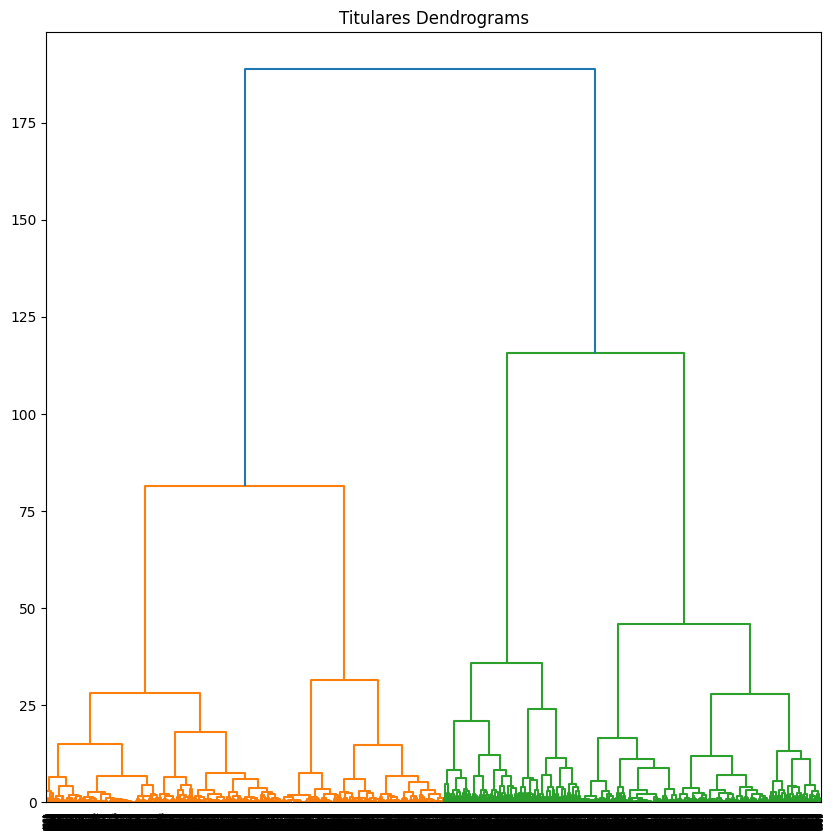

In [137]:
# plotando um Dendrograma 
plt.figure(figsize=(10, 10)) 
plt.title('Titulares Dendrograms') 
dendrogram(Z, labels = X.index) 
plt.savefig('grafic_image/dendrograma.png', format='png')
plt.show()

- O Dendograma nos mostra quantos clusters poderiam ser formados, não levando em conta a performance do modelo e a melhor representação dos clusters. A quantidade de nossos cluster, 4, ficou na terceira camada, sendo avaliado, pela técnica do cotovelo e da silhueta como a melhor quantidade a ser utilizada.

In [138]:
# 'achatando' o dendograma
distance_threshold = 13 
clusters = fcluster(Z, distance_threshold, criterion='distance') 
chosen_clusters = pd.DataFrame(data=clusters, columns=['cluster']) 
chosen_clusters['cluster'].unique()

array([ 5, 14,  2,  7,  3,  6,  4, 13,  9,  8, 15, 11, 16, 10,  1, 12])

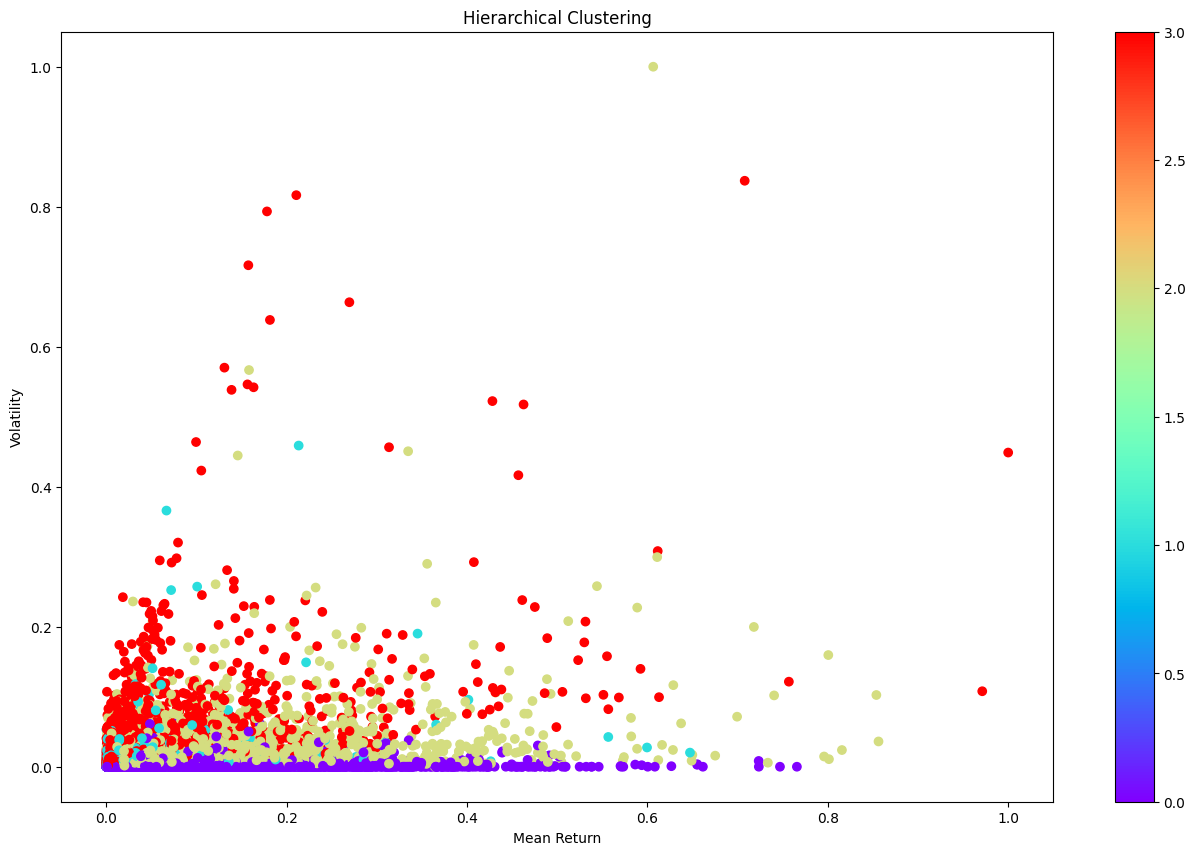

In [139]:
# treinando-ajustando AgglomerativeClustering
nclust = 4 
AggloClus = AgglomerativeClustering(n_clusters=nclust, metric='euclidean', linkage='ward') 
clust_labels1 = AggloClus.fit_predict(X) 
fig = plt.figure(figsize=(16,10)) 
ax = fig.add_subplot(111)

scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=clust_labels1, cmap='rainbow') 
ax.set_title('Hierarchical Clustering') 
ax.set_xlabel('Mean Return') 
ax.set_ylabel('Volatility') 
plt.colorbar(scatter)

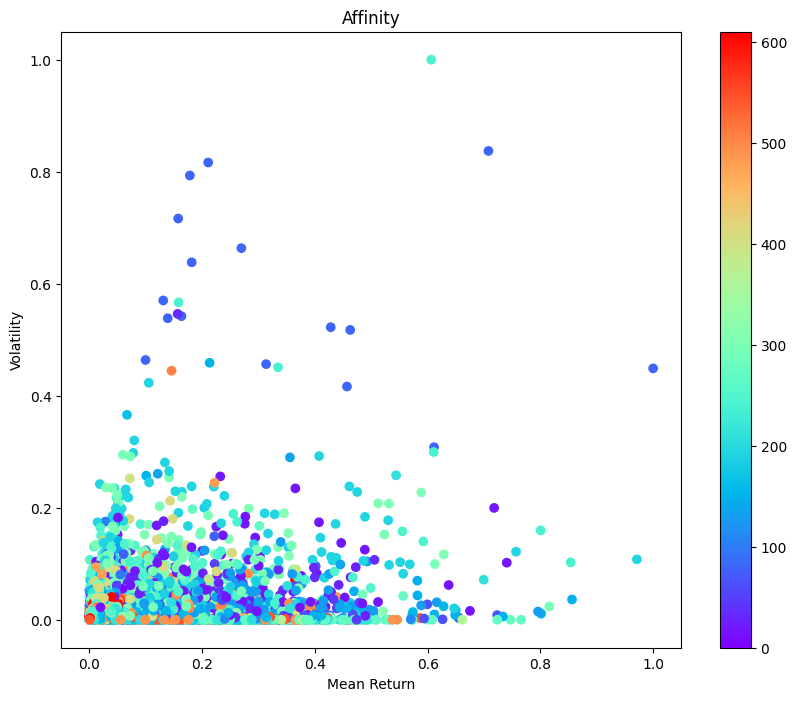

In [140]:
# treinando-ajustando AffinityPropagation
AffinPropag = AffinityPropagation() 
AffinPropag.fit(X) 
clust_labels2 = AffinPropag.predict(X) 
fig = plt.figure(figsize=(10,8)) 
ax = fig.add_subplot(111) 
scatter = ax.scatter(X.iloc[:,0],X.iloc[:,1], c=clust_labels2, cmap='rainbow') 
ax.set_title('Affinity') 
ax.set_xlabel('Mean Return') 
ax.set_ylabel('Volatility') 
plt.colorbar(scatter)

In [141]:
# verificando o silhouette score para escolher o modelo de melhor performance
from sklearn import metrics 

print('kmeans', metrics.silhouette_score(X, k_means.labels_, metric='euclidean')) 
print('AggloClus', metrics.silhouette_score(X, AggloClus.fit_predict(X), metric='euclidean'))
print('AffinPropag', metrics.silhouette_score(X, AffinPropag.labels_, metric='euclidean'))

kmeans 0.5214449102378611
AggloClus 0.5140943143494716
AffinPropag 0.1817609038808138


- Verificamos que o melhor silhouette_score dentre os 3 modelos utilizados foi do kmeans tornando esse o modelo que melhor desempenha a função de clusterização, sendo o que será considerado nesse trabalho.

In [142]:
# mostrando os labels de dados dos clusters do kmeans
k_means.labels_

array([1, 0, 3, ..., 3, 0, 2])

In [143]:
# associando os dados transformados originais com a coluna de clusters criados
df_clustered = df_card_trans.copy()
df_clustered["cluster"] = k_means.labels_

df_clustered.head()

,titular,saldo_cred_restante,freq_atu_saldo,qtde_compras,vr_max_compra_feita,vr_compra_feita_parcelas,dinh_adiantado_usu,freq_compras,freq_compras_1vez,freq_compras_parcelas,freq_pag_dinh_adiantado,trans_dinh_adiantado,trans_compra_feita,limite_cartao,vr_pag_feito_usu,vr_min_pagtos_feito_usu,%pag_integral_feito_usu,prazo_serv_cartao_usu,minmax__saldo_cred_restante,minmax__qtde_compras,minmax__vr_max_compra_feita,minmax__vr_compra_feita_parcelas,minmax__dinh_adiantado_usu,minmax__limite_cartao,minmax__vr_pag_feito_usu,minmax__vr_min_pagtos_feito_usu,power__freq_atu_saldo,power__freq_compras,power__freq_compras_1vez,power__freq_compras_parcelas,power__freq_pag_dinh_adiantado,power__trans_dinh_adiantado,power__trans_compra_feita,power__%pag_integral_feito_usu,power__prazo_serv_cartao_usu,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0.002148,0.001945,0.000000,0.004240,0.000000,0.031720,0.003978,0.001826,-1.269589,-0.787010,-0.909176,-0.622043,-0.888595,-0.911869,-0.591497,-0.693374,0.417156,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.168169,0.000000,0.000000,0.000000,0.136685,0.232053,0.080892,0.014034,-0.594878,-1.285866,-0.909176,-1.012022,1.102197,1.025584,-1.392628,1.179060,0.417156,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.131026,0.015766,0.018968,0.000000,0.000000,0.248748,0.012263,0.008210,0.612641,1.211921,1.724959,-1.012022,-0.888595,-0.911869,0.472489,-0.693374,0.417156,3
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.095038,0.027188,0.000000,0.059257,0.000000,0.058431,0.027602,0.031506,0.612641,0.488440,-0.909176,0.782421,-0.888595,-0.911869,0.206232,-0.693374,0.417156,3
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,0.032939,0.144598,0.157076,0.030595,0.000000,0.449082,0.125278,0.002592,0.612641,1.211921,1.724959,1.371236,-0.888595,-0.911869,1.633374,1.851822,0.417156,3


In [144]:
# verificando a quantidade de linhas para cada cluster associado
df_clustered["cluster"].value_counts()

cluster
3    2657
0    2539
1    1676
2    1467
Name: count, dtype: int64

- Observamos uma quantidade bem distribuida de ocorrências de cartão de crédito dentre os 4 clusters criados.

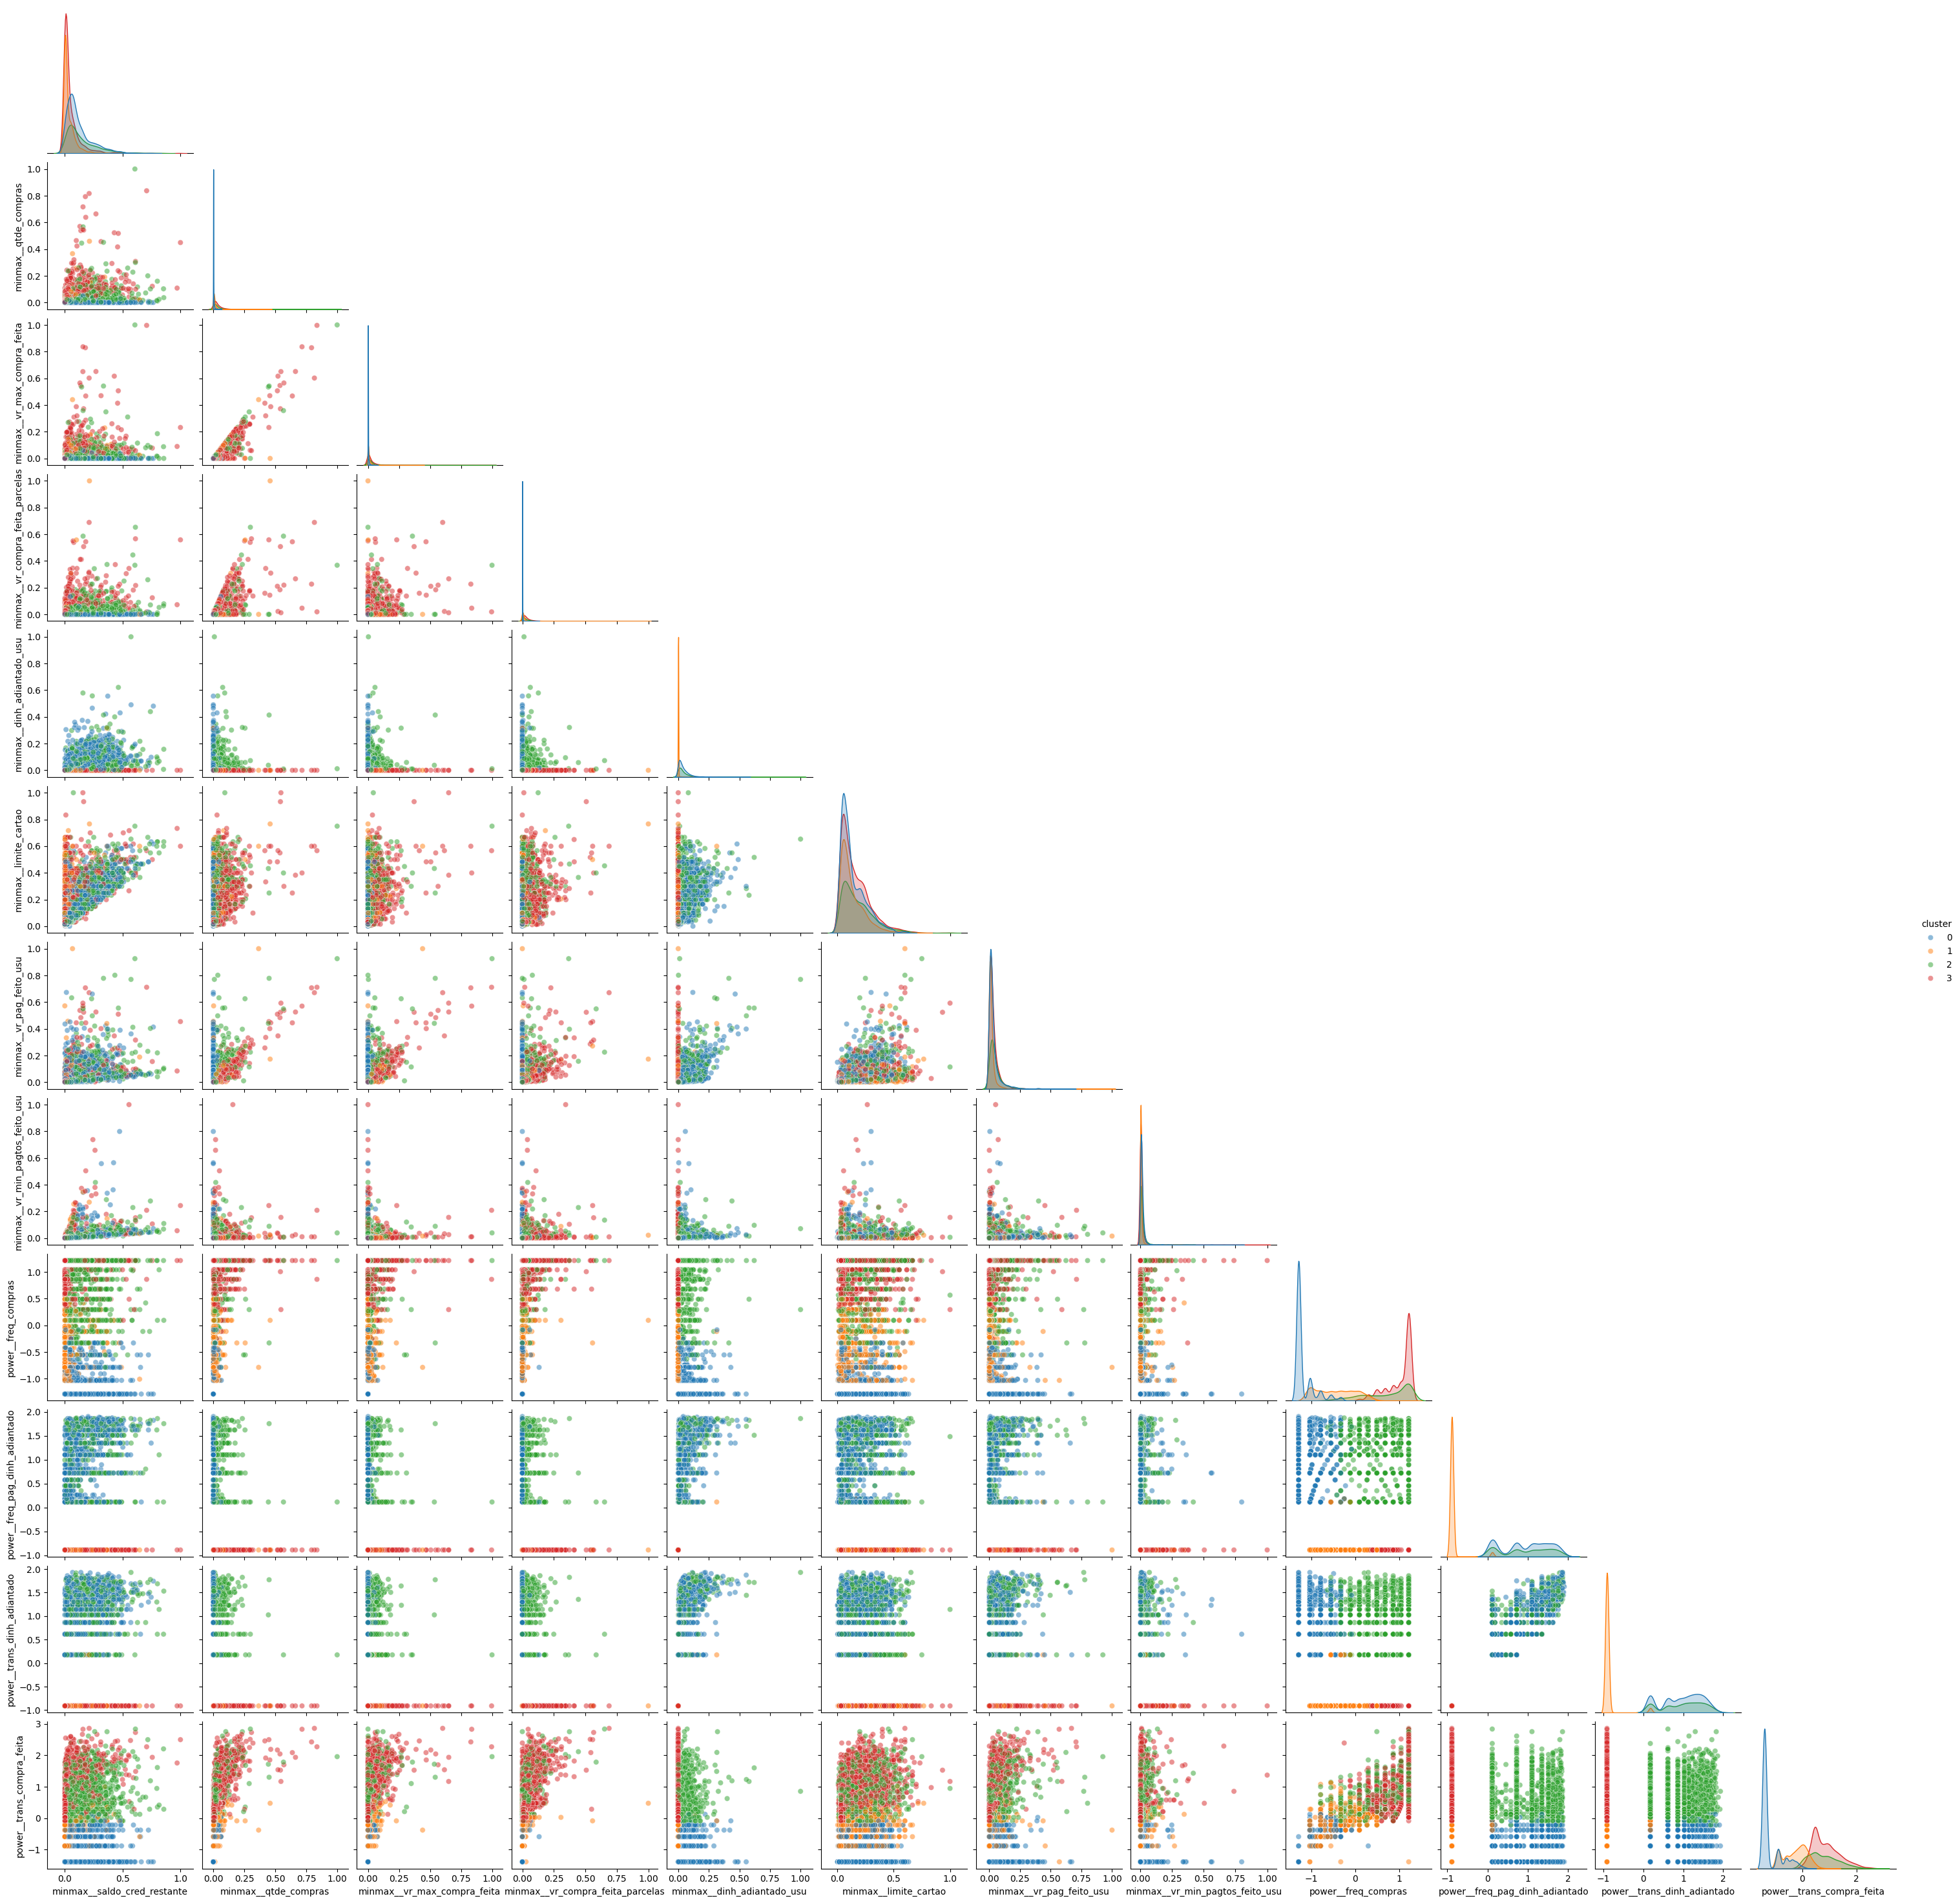

In [145]:
# plotando a distribuição dos dados numéricos agrupados em seus devidos clusters
columns_analysis = list(X.columns)

from auxiliary_functions import pairplot

pairplot(df_clustered, columns_analysis, hue_column="cluster")

In [146]:
# movendo os dados clusterizados para o dataframe original
df_card_trans = df_clustered

In [147]:
# verificando as primeiras linhas clusterizadas
df_card_trans.head(5)

,titular,saldo_cred_restante,freq_atu_saldo,qtde_compras,vr_max_compra_feita,vr_compra_feita_parcelas,dinh_adiantado_usu,freq_compras,freq_compras_1vez,freq_compras_parcelas,freq_pag_dinh_adiantado,trans_dinh_adiantado,trans_compra_feita,limite_cartao,vr_pag_feito_usu,vr_min_pagtos_feito_usu,%pag_integral_feito_usu,prazo_serv_cartao_usu,minmax__saldo_cred_restante,minmax__qtde_compras,minmax__vr_max_compra_feita,minmax__vr_compra_feita_parcelas,minmax__dinh_adiantado_usu,minmax__limite_cartao,minmax__vr_pag_feito_usu,minmax__vr_min_pagtos_feito_usu,power__freq_atu_saldo,power__freq_compras,power__freq_compras_1vez,power__freq_compras_parcelas,power__freq_pag_dinh_adiantado,power__trans_dinh_adiantado,power__trans_compra_feita,power__%pag_integral_feito_usu,power__prazo_serv_cartao_usu,cluster
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0.0,2.0,1000.0,201.802084,139.509787,0.000000,12.0,0.002148,0.001945,0.000000,0.004240,0.000000,0.031720,0.003978,0.001826,-1.269589,-0.787010,-0.909176,-0.622043,-0.888595,-0.911869,-0.591497,-0.693374,0.417156,1
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4.0,0.0,7000.0,4103.032597,1072.340217,0.222222,12.0,0.168169,0.000000,0.000000,0.000000,0.136685,0.232053,0.080892,0.014034,-0.594878,-1.285866,-0.909176,-1.012022,1.102197,1.025584,-1.392628,1.179060,0.417156,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0.0,12.0,7500.0,622.066742,627.284787,0.000000,12.0,0.131026,0.015766,0.018968,0.000000,0.000000,0.248748,0.012263,0.008210,0.612641,1.211921,1.724959,-1.012022,-0.888595,-0.911869,0.472489,-0.693374,0.417156,3
3,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0.0,1.0,1200.0,678.334763,244.791237,0.000000,12.0,0.095038,0.027188,0.000000,0.059257,0.000000,0.058431,0.027602,0.031506,0.612641,0.488440,-0.909176,0.782421,-0.888595,-0.911869,0.206232,-0.693374,0.417156,3
4,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0.0,8.0,1800.0,1400.057770,2407.246035,0.000000,12.0,0.032939,0.144598,0.157076,0.030595,0.000000,0.449082,0.125278,0.002592,0.612641,1.211921,1.724959,1.371236,-0.888595,-0.911869,1.633374,1.851822,0.417156,3


In [149]:
# verificando os dados que deram origem aos clusters
df_card_trans[list(X.columns) + ['cluster']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8339 entries, 0 to 8338
Data columns (total 13 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   minmax__saldo_cred_restante       8339 non-null   float64
 1   minmax__qtde_compras              8339 non-null   float64
 2   minmax__vr_max_compra_feita       8339 non-null   float64
 3   minmax__vr_compra_feita_parcelas  8339 non-null   float64
 4   minmax__dinh_adiantado_usu        8339 non-null   float64
 5   minmax__limite_cartao             8339 non-null   float64
 6   minmax__vr_pag_feito_usu          8339 non-null   float64
 7   minmax__vr_min_pagtos_feito_usu   8339 non-null   float64
 8   power__freq_compras               8339 non-null   float64
 9   power__freq_pag_dinh_adiantado    8339 non-null   float64
 10  power__trans_dinh_adiantado       8339 non-null   float64
 11  power__trans_compra_feita         8339 non-null   float64
 12  cluste

In [150]:
# monta linha select para agrupar a soma dos valores por cluster das colunas envolvidas
linha = ''

for col in list(X.columns):
    linha = linha + ' sum(' + col + ') as ' + col + ','

# retira última vírgula
linha = linha[:(len(linha) -1)]

In [151]:
# montando a query para agrupar a soma dos valores por cluster
from pandasql import sqldf

df_card_trans_cluster = sqldf(
             " select cluster, " \
             + linha + \
             " from df_card_trans " \
             " group by cluster " \
             " order by cluster "
             )

In [152]:
# verificando as primeiras linhas do dataframe de agrupamento por cluster
df_card_trans_cluster

,cluster,minmax__saldo_cred_restante,minmax__qtde_compras,minmax__vr_max_compra_feita,minmax__vr_compra_feita_parcelas,minmax__dinh_adiantado_usu,minmax__limite_cartao,minmax__vr_pag_feito_usu,minmax__vr_min_pagtos_feito_usu,power__freq_compras,power__freq_pag_dinh_adiantado,power__trans_dinh_adiantado,power__trans_compra_feita
0,0,300.977984,3.825553,4.030215,1.042156,111.072859,348.930591,87.594647,33.690685,-2974.801158,2414.804250,2450.476988,-3023.382615
1,1,58.130776,17.817841,14.580433,12.444090,0.939288,216.969505,31.491668,10.249229,-737.925756,-1435.947318,-1470.720720,-403.489197
2,2,209.787490,48.772382,35.308198,42.363392,63.982956,261.328251,78.748941,24.574406,1042.402444,1377.037558,1442.557370,1123.240826
3,3,131.411437,104.602900,70.335740,100.628361,0.000000,418.375263,95.472802,25.332851,2668.325946,-2360.996703,-2422.836640,2305.787616


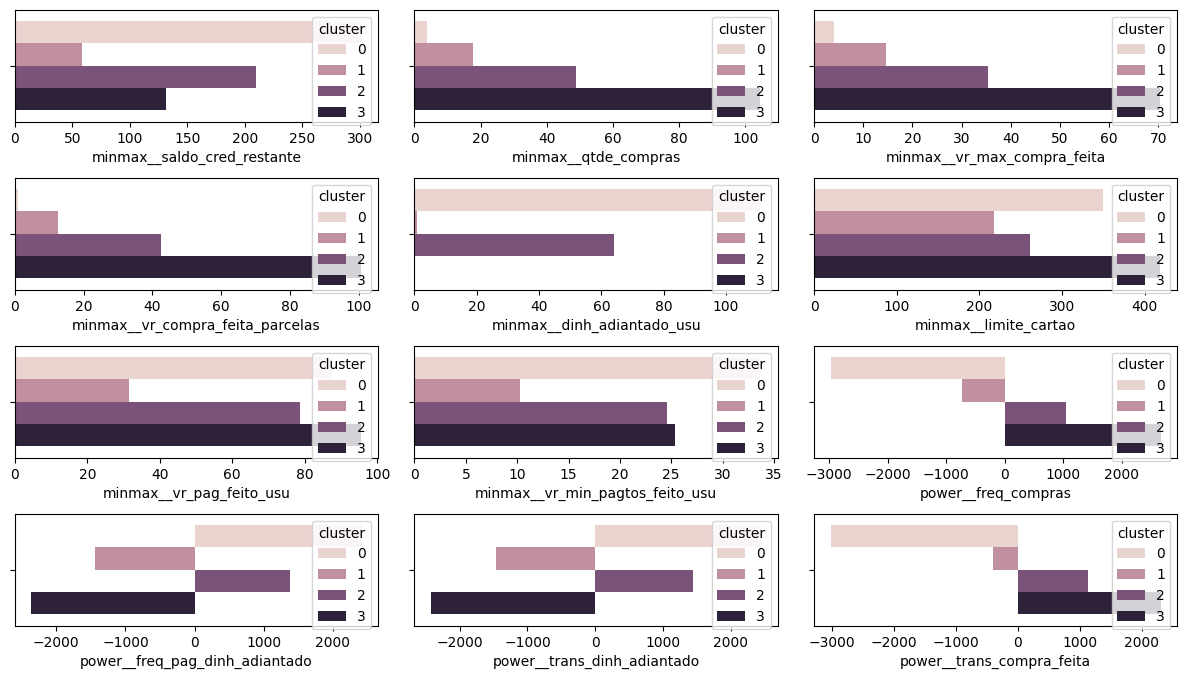

In [153]:
# plotando os valores agrupados dos clusters por variável
dataframe = df_card_trans_cluster
columns = list(df_card_trans_cluster.columns[1:])
rows_cols=(4, 3)
figsize=(15, 8)
column_cluster="cluster"

fig, axs = plt.subplots(
    nrows=rows_cols[0], ncols=rows_cols[1], figsize=figsize, sharey=True
)

for ax, col in zip(axs.flatten(), columns):
    h = sns.barplot(
        x=col,
        hue=column_cluster,
        data=dataframe,
        ax=ax,
    )

plt.subplots_adjust(hspace=0.5, wspace=0.1)

plt.show()

- A categorização de cada cluster ficará a cargo do departamento que for fazer uso dessa informação.

In [154]:
# salvando os dados originais, transformados e clusterizados em arquivo 
df_card_trans.to_csv("df_treated/df_card_clustered.csv", index=False)

In [155]:
# salvando o modelo de geração de clusters em arquivo .pkl
import joblib
joblib.dump(k_means, "model/kmeans_card_holder.pkl")

['model/kmeans_card_holder.pkl']